In [162]:
import sys
#sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [163]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level


In [164]:
%load_ext autoreload
%autoreload 2
import importlib

import Real_Custom_v2 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

import FlowRank as FR
FR=importlib.reload(FR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading dataset

In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pynndescent import NNDescent
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# from scanpy import read_h5ad
# import utils
import scipy
from scipy import sparse
import metric as met 
# import simulation as simm
import embedding as embed
import FlowRank as FR

from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics import v_measure_score as v_score
from sklearn.metrics import homogeneity_score as homogeneity
from sklearn.metrics import completeness_score as completeness


In [6]:
# data = sparse.load_npz('I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/ALM/data.npz')
# data = data.todense()
# data = np.array(data)


## Zhengmix dataset

In [181]:
name='Zhengmix'
kchoice=20 #k neighbors in KNN
datapath = 'I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/'

X = scipy.sparse.load_npz(datapath+name + '/data.npz')
label = np.load(datapath+name+'/labels.npy')
print(name,len(label))

#Log transform+PCA
X.data = np.log1p(X.data)
print("Log transform done")
pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

# #Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

#Make a NetworkX Directed Graph from the edgelist
G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

Zhengmix 3994
Log transform done
(3994, 50)
Accuracy of  20 -NN graph is 0.785
79880


In [182]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in final_partition_1:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

## Result Metrics Table and Visualization

Max NMI and Purity for Louvain :
 [0.786, 0.66] res: 0.3 
 [0.575, 0.823] res: 7
Max NMI and Purity for Cust_Rand :
 [0.779, 0.661] res: 2.9 
 [0.779, 0.661] res: 2.9
Max NMI and Purity for Cust_FR_order :
 [0.792, 0.662] res: 2.9 
 [0.79, 0.662] res: 2.7
Max NMI and Purity for Cust_FR_Recalc :
 [0.796, 0.665] res: 0.25 
 [0.78, 0.803] res: 1
        NMI  Purity  V-score  Homogeneity  Completeness
0.10  0.689   0.546    0.689        0.535         0.966
0.18  0.782   0.657    0.782        0.679         0.921
0.20  0.782   0.657    0.782        0.679         0.921
0.22  0.782   0.657    0.782        0.679         0.921
0.24  0.782   0.657    0.782        0.679         0.921
0.26  0.782   0.657    0.782        0.679         0.921
0.30  0.786   0.660    0.786        0.683         0.925
0.40  0.786   0.660    0.786        0.683         0.925
0.50  0.784   0.658    0.784        0.681         0.925
0.70  0.775   0.803    0.775        0.756         0.794
0.85  0.719   0.796    0.719        0.7

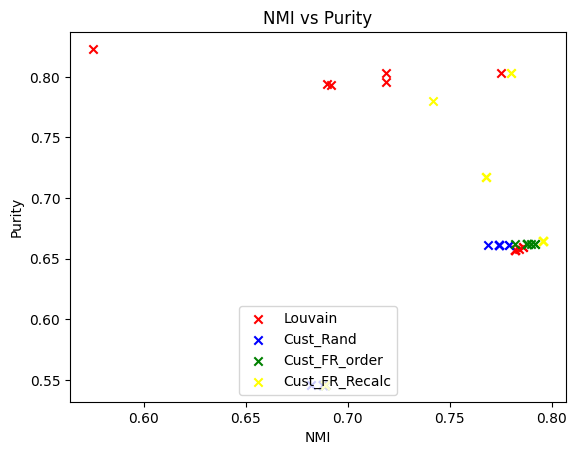

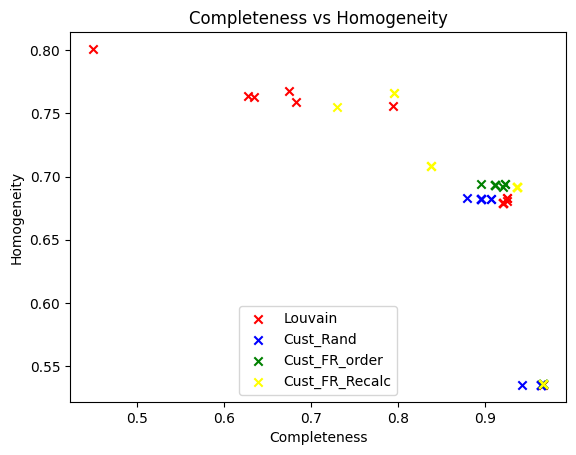

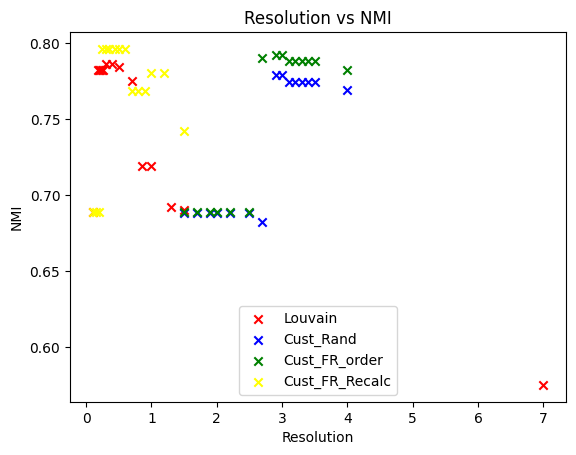

In [184]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5,7]
#res_list=[0.8,1]
#0.26, 0.24 is best for Louvain
#res_list = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
#res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
#res_list = [1,10]
#3.3
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

#2.0
import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

res_list = [0.1,0.15,0.2,0.25,0.3,0.35,0.45,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5]
import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)

        NMI  Purity  V-score  Homogeneity  Completeness
1.3    0.77    0.66     0.77         0.67          0.90
1.5    0.78    0.66     0.78         0.68          0.91
3.0    0.75    0.69     0.75         0.70          0.82
5.0    0.65    0.60     0.65         0.56          0.79
10.0   0.64    0.63     0.64         0.57          0.74
13.0   0.72    0.79     0.72         0.75          0.69
17.0   0.69    0.75     0.69         0.71          0.67
18.0   0.71    0.69     0.71         0.70          0.73
20.0   0.73    0.73     0.73         0.71          0.75
30.0   0.68    0.78     0.68         0.74          0.62
40.0   0.71    0.73     0.71         0.70          0.73
50.0   0.71    0.81     0.71         0.77          0.66
60.0   0.73    0.75     0.73         0.74          0.71
70.0   0.65    0.74     0.65         0.74          0.59
100.0  0.66    0.73     0.66         0.72          0.61


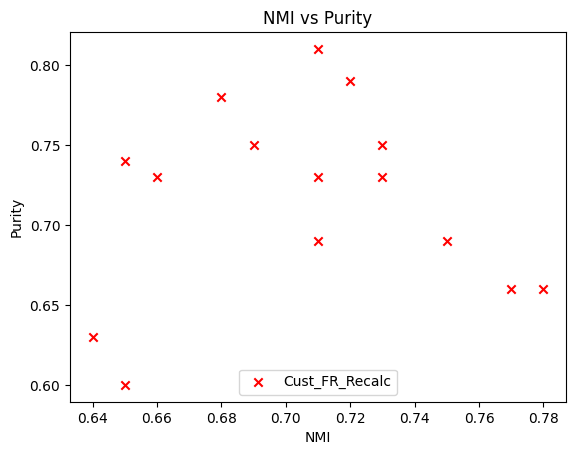

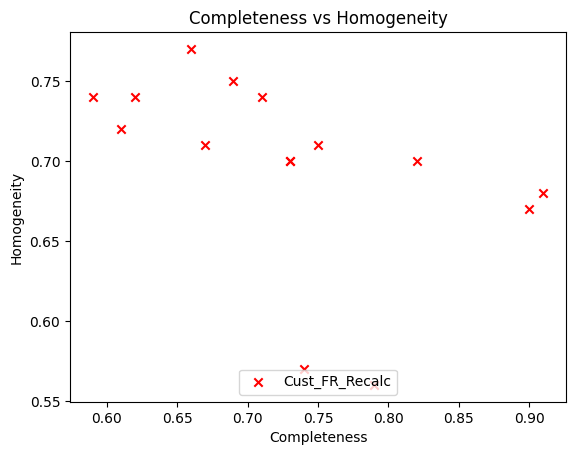

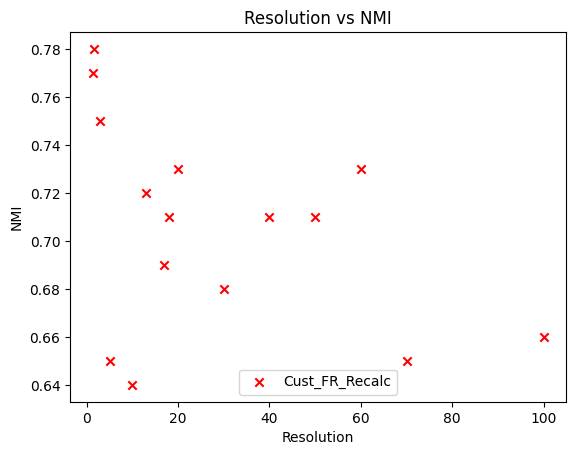

In [151]:
import analysis as an
n=len(G.nodes())
res_=[]
#res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Cust_FR_Recalc']
res_list=[1.3,1.5,3,5,10,13,17,18,20,30,40,50,60,70,100]
import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)

In [150]:

res_list1=[1.3,1.5,3,5,10,13,17,18,20,30,40,50,60,70,100]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]

print(len(res_list),len(res_list1))

15 15


## Fashion Mnist Dataset

In [161]:
import tensorflow as tf
import random
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape,y_train.shape)

X_F=x_train.reshape(x_train.shape[0], 784)
print(X_F.shape)
n=X_F.shape[0]
label_F=y_train

seq=[i for i in range(n)]
subset=random.sample(seq, n//5)

X=X_F[subset,:]
label=label_F[subset]

pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

#Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

print(G.number_of_nodes())

(60000, 28, 28) (60000,)
(60000, 784)
(12000, 50)
Accuracy of  20 -NN graph is 0.761
240000
12000


Max NMI and Purity for Louvain :
 [0.679, 0.638] 
 [0.517, 0.765]
Max NMI and Purity for Cust_Rand :
 [0.675, 0.632] 
 [0.675, 0.632]
Max NMI and Purity for Cust_FR_order :
 [0.694, 0.637] 
 [0.667, 0.643]
Max NMI and Purity for Cust_FR_Recalc :
 [0.684, 0.637] 
 [0.639, 0.64]
        NMI  Purity  V-score  Homogeneity  Completeness
0.10  0.653   0.474    0.653        0.540         0.827
0.18  0.654   0.474    0.654        0.541         0.827
0.20  0.652   0.474    0.652        0.539         0.825
0.22  0.661   0.561    0.661        0.577         0.775
0.24  0.679   0.638    0.679        0.618         0.754
0.26  0.679   0.638    0.679        0.618         0.754
0.30  0.670   0.609    0.670        0.604         0.753
0.40  0.648   0.634    0.648        0.617         0.683
0.50  0.624   0.621    0.624        0.613         0.634
0.70  0.629   0.668    0.629        0.655         0.606
0.85  0.615   0.671    0.615        0.649         0.584
1.00  0.624   0.669    0.624        0.663         

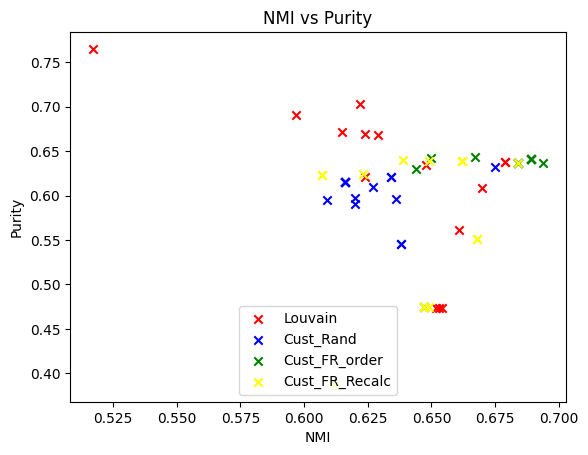

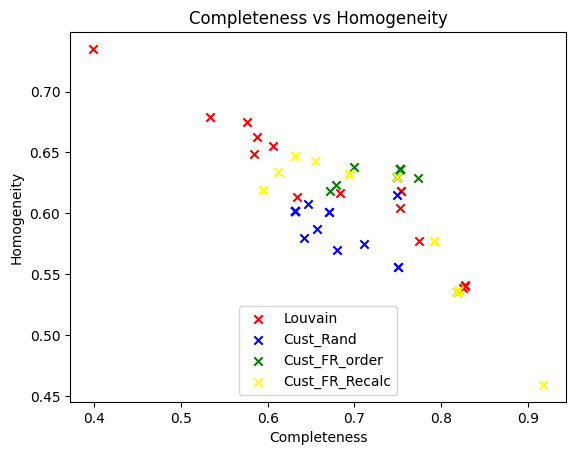

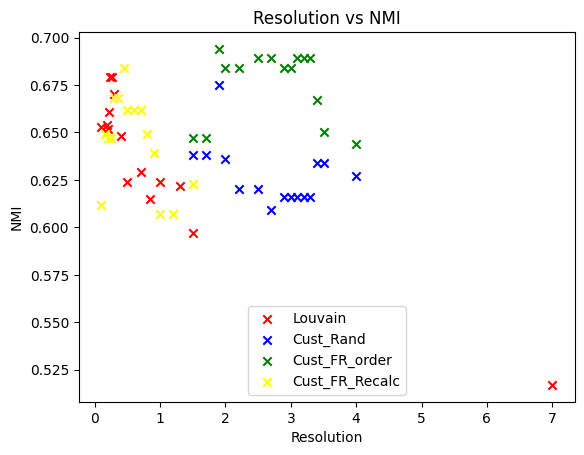

In [178]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5,7]
#res_list=[0.8,1]
#0.26, 0.24 is best for Louvain
#res_list = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
#res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
#res_list = [1,10]
#3.3
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

#2.0
import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

res_list = [0.1,0.15,0.2,0.25,0.3,0.35,0.45,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5]
import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)

## Artificial Graph with Strong MCPC characteristics

In [139]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=n_s) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
#nx.draw(G, with_labels=True)


         NMI  Purity  V-score  Homogeneity  Completeness
0.10    0.93    0.99     0.93         0.93          0.93
0.30    0.93    0.99     0.93         0.93          0.93
0.50    0.93    0.99     0.93         0.93          0.93
0.70    0.93    0.99     0.93         0.93          0.93
0.85    0.93    0.99     0.93         0.93          0.93
0.95    0.93    0.99     0.93         0.93          0.93
1.00    0.93    0.99     0.93         0.93          0.93
1.05    0.93    0.99     0.93         0.93          0.93
1.10    0.93    0.99     0.93         0.93          0.93
1.30    0.93    0.99     0.93         0.93          0.93
1.50    0.93    0.99     0.93         0.93          0.93
3.00    0.32    0.99     0.32         0.97          0.19
5.00    0.28    0.98     0.28         0.95          0.16
7.00    0.26    0.98     0.26         0.95          0.15
10.00   0.27    0.99     0.27         0.98          0.15
0.10    0.00    0.50     0.00         0.00          1.00
0.30    0.93    0.99     0.93  

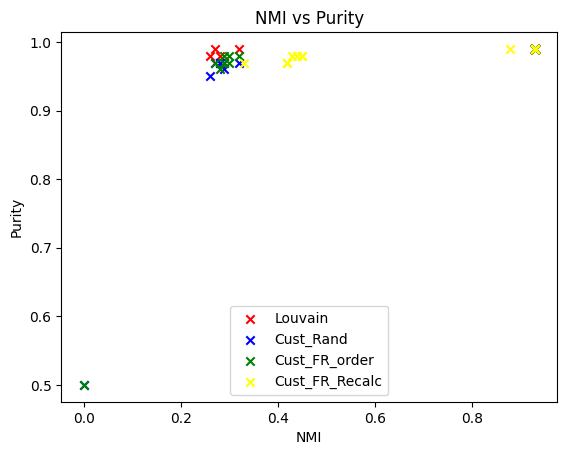

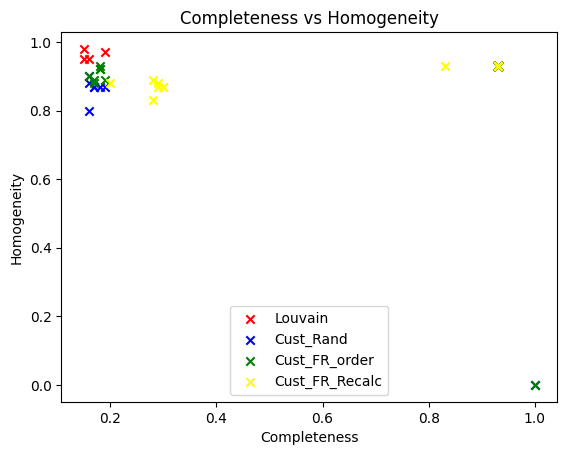

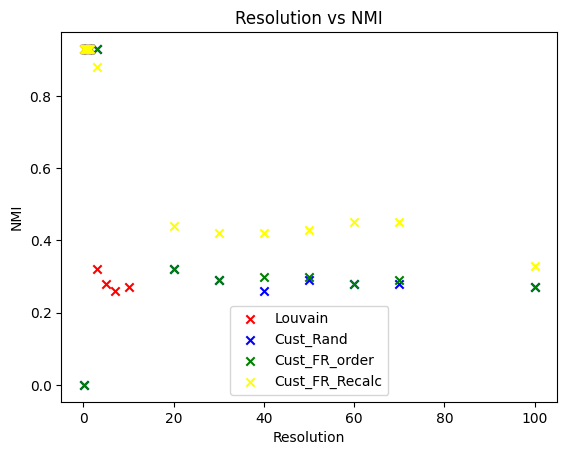

In [141]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
#res_list = [1,10]
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)